In [3]:
import data_prep
from mpaa_analysis import *
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

## Data Parsing

In [4]:
%%time

genre_listing = data_prep.read_genres('imdb/genres.list')
rating_listing = data_prep.read_ratings('imdb/ratings.list')
mpaa = data_prep.read_mpaa('imdb/mpaa-ratings-reasons.list')

movies = data_prep.merge_all(rating_listing, genre_listing, mpaa)

train, test = split_data(movies)

vectorizer, train_data_features = create_train_features(train)
test_data_features = create_test_features(test, vectorizer)

Parsing genre list documentation block
Reading genre list into memory
Parsing ratings documentation block
Parse ratings lines and convert to DataFrame
Filter set to true, ignoring entries with <1000 entries
31783 movies returned
Opening mpaa files
Cleaning mpaa data
Performing initial merge
Cleaning title
CPU times: user 19.4 s, sys: 1.01 s, total: 20.4 s
Wall time: 21.2 s


## Classifier Training and Prediction

In [5]:
forest = fit_random_forest(train, train_data_features, 'label')
xforest = fit_xrandom_forest(train, train_data_features, 'label')
trees = fit_dectree(train, train_data_features, 'label')

In [6]:
test_forest = pred_random_forest(test, test_data_features, forest)
test_xforest = pred_xrandom_forest(test, test_data_features, xforest)
test_trees = pred_dectree(test, test_data_features, trees)

In [17]:
def show_conf_mat(test):
    conf = confusion_matrix(test.label.astype('str').values,
                                 test.predictions.astype('str').values)
    conf_norm = conf.astype('float') / conf.sum(axis=1)
    plt.imshow(conf_norm, interpolation='nearest', cmap=plt.cm.Blues)

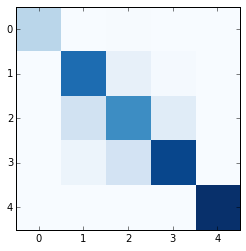

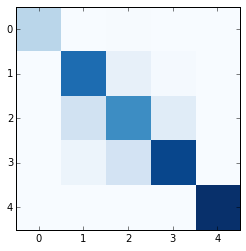

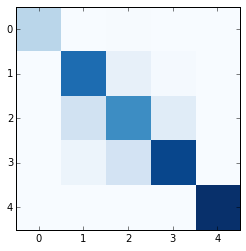

In [18]:
plt.figure()
show_conf_mat(test_forest)

plt.figure()
show_conf_mat(test_trees)

plt.figure()
show_conf_mat(test_xforest)

In [7]:
print confusion_matrix(test_forest.label.astype('str').values,
                       test_forest.predictions.astype('str').values)

print confusion_matrix(test_xforest.label.astype('str').values,
                       test_xforest.predictions.astype('str').values)

print confusion_matrix(test_trees.label.astype('str').values,
                       test_trees.predictions.astype('str').values)

[[   0    0    0    6]
 [   0  150   41   20]
 [   0   44  318  152]
 [   2    9   86 1096]]
[[   0    0    0    6]
 [   0  150   41   20]
 [   0   44  318  152]
 [   2    9   86 1096]]
[[   0    0    0    6]
 [   0  150   41   20]
 [   0   44  318  152]
 [   2    9   86 1096]]


In [8]:
test_trees.label.value_counts()

R        1193
PG-13     514
PG        211
NC-17       6
Name: label, dtype: int64